In [96]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# linear regression function 
def perform_linear_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model.predict(X),model.coef_[0], model.intercept_

# polynomial regression function
def perform_polynomial_regression(X, y, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    return model.predict(X_poly), model.coef_, model.intercept_

# Input data
# only inputting 20 random values will have no significance and it will fit any kind of regression 
# So, number of input is considered 10*2, here each pair of input contains two numeric
# inputs namely x(independent) and y(dependent)

number_of_input = 10 
data = {'x': [], 'y': []}

for i in range(number_of_input):
    while True:
        try:
            x = float(input(f"Enter x value {i + 1}: "))
            y = float(input(f"Enter corresponding y value {i + 1}: "))
            data['x'].append(x)
            data['y'].append(y)
            break
        except ValueError:
            print("Invalid input. Please enter numeric values.")

# Creating a DataFrame from the input data
df = pd.DataFrame(data)


Enter x value 1: 1
Enter corresponding y value 1: 1
Enter x value 2: 2
Enter corresponding y value 2: 4
Enter x value 3: 3
Enter corresponding y value 3: 9
Enter x value 4: 4
Enter corresponding y value 4: 17
Enter x value 5: 8
Enter corresponding y value 5: 65
Enter x value 6: 5
Enter corresponding y value 6: 27
Enter x value 7: 6
Enter corresponding y value 7: 40
Enter x value 8: 7
Enter corresponding y value 8: 45
Enter x value 9: 9
Enter corresponding y value 9: 85
Enter x value 10: 10
Enter corresponding y value 10: 105


Choose regression type (linear/polynomial): polynomial
Enter the degree of the polynomial regression: 2


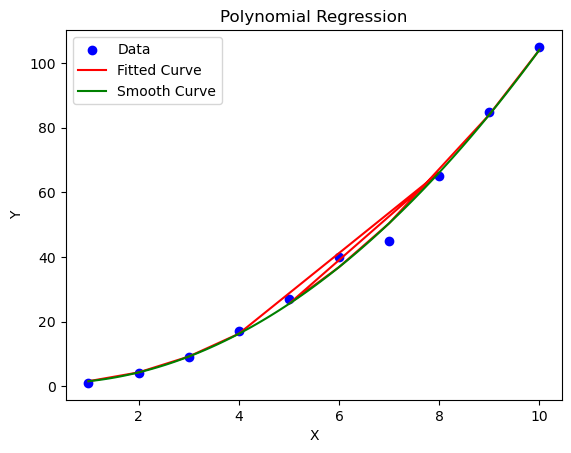


DataFrame with Predicted Values:
      x      y  predicted_y
0   1.0    1.0     1.527273
1   2.0    4.0     4.254545
2   3.0    9.0     9.148485
3   4.0   17.0    16.209091
4   8.0   65.0    66.118182
5   5.0   27.0    25.436364
6   6.0   40.0    36.830303
7   7.0   45.0    50.390909
8   9.0   85.0    84.012121
9  10.0  105.0   104.072727

Regression Function: y = 0.00x^0 + -0.52x^1 + 1.08x^2 + 0.97


In [101]:

# Choossing regression type
while True:
    regression_type = input("Choose regression type (linear/polynomial): ").strip().lower()
    if regression_type in ["linear", "polynomial"]:
        break
    else:
        print("Invalid input. Please choose 'linear' or 'polynomial'.")

if regression_type == "linear":
    predicted_values,  slope, intercept = perform_linear_regression(df[['x']], df['y'])
    regression_function = f"y = {slope:.2f}x + {intercept:.2f}" # creates the regression function as strings 


elif regression_type == "polynomial":
    degree = int(input("Enter the degree of the polynomial regression: "))
    predicted_values, coeffs, intercept = perform_polynomial_regression(df[['x']], df['y'], degree )
    # creates the regression function as strings
    regression_function = "y = "
    for i, coef in enumerate(coeffs): 
        regression_function += f"{coef:.2f}x^{i} + " 
    regression_function += f"{intercept:.2f}"
    
# Addiing predicted values to the DataFrame
df['predicted_y'] = predicted_values

# Generating additional data points for smooth visualization
x_smooth = np.linspace(min(df['x']), max(df['x']), 100)  # 100 points between max and min
# Creating a DataFrame for the smooth curve
smooth_df = pd.DataFrame({'x': x_smooth, 'smooth_y': y_smooth})

if regression_type == "linear":
    y_smooth = slope * x_smooth + intercept
if regression_type == "polynomial":
    y_smooth = np.zeros_like(x_smooth)
    for i, coef in enumerate(coeffs):
        y_smooth += coef * (x_smooth ** i)
    y_smooth += intercept
    
## Plotting the results
# creating another data frame for smoothness of the curve
# using the function to create the corresponding pridected value

plt.scatter(df['x'], df['y'], color='blue', label='Data')
plt.plot(df['x'], df['predicted_y'], color='red', label='Fitted Curve')
plt.plot(smooth_df['x'], smooth_df['smooth_y'], color='green', label='Smooth Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{regression_type.capitalize()} Regression')
plt.legend()
plt.show()

# showing the DataFrame
print("\nDataFrame with Predicted Values:")
print(df)

# showing the regression function
print(f"\nRegression Function: {regression_function}")
